# Random forest


In [24]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use("seaborn-white")

df = pd.read_csv("../data/Heart.csv", index_col = 0)
df.head()

/var/folders/z0/17ykh1n151x8y8rfk6dfkv500000gn/T/ipykernel_34241/1438695323.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


<Axes: xlabel='AHD', ylabel='count'>

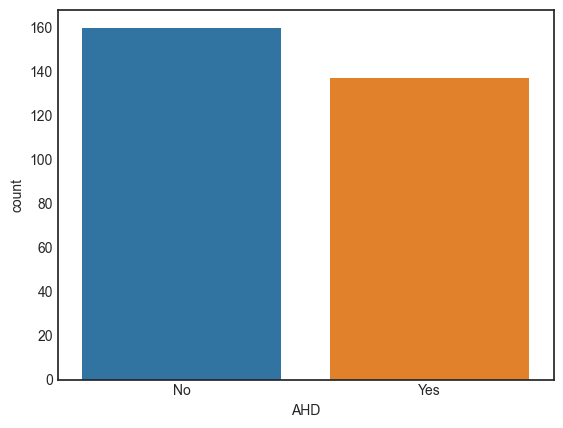

In [26]:
df.dropna(inplace=True)

sns.countplot(data = df, x = "AHD")

In [27]:
df_dummies = pd.get_dummies(df, drop_first=True)
X, y = df_dummies.drop("AHD_Yes", axis=1), df_dummies["AHD_Yes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [28]:
from utils import print_shapes

print_shapes(X_train, X_test=X_test, y_train=y_train, y_test=y_test)

X_train.shape = (237, 16)
X_test.shape = (60, 16)
y_train.shape = (237,)
y_test.shape = (60,)



## Random Forest

In [29]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=uint8)

## Hyperparameter tuning

In [30]:
from sklearn.model_selection import GridSearchCV

#coarse tuning
param_grid = {"n_estimators": [100, 150, 200,
                               300], 'max_depth':[5,10,15,20]}
clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid,
                   cv=5, verbose=1, scoring="recall")
clf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='recall', verbose=1)

In [31]:
clf.best_params_

{'max_depth': 10, 'n_estimators': 100}

## Evaluation

- default
- hyperparameters tuned

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.85      0.92      0.88        24

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



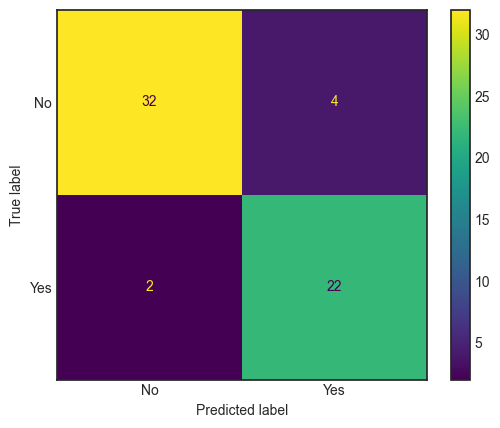

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_classification(y_test, y_pred, labels = ["No", "Yes"]):
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=labels).plot()

evaluate_classification(y_test, y_pred)

## Feature Importance

NOTE:When doing feature importance, its better 

In [33]:
from utils import evaluate_classification

y_pred = clf.predict(X_test)
evaluate_classification(y_test, y_pred, labels=['No', 'Yes'])

ImportError: cannot import name 'evaluate_classification' from 'utils' (/Users/Cyrille/Documents/aiml22/Machine-Learning-Cyrille-Ngide/Code-along/utils.py)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.85      0.92      0.88        24

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



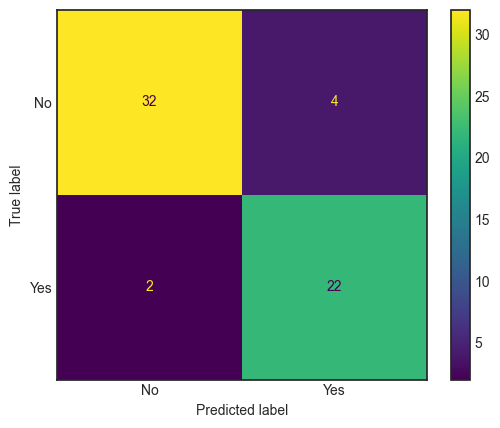

In [ ]:
y_pred_tuned = clf.predict(X_test)
evaluate_classification(y_test, y_pred_tuned)

In [ ]:
model_rf.feature_importances_

array([0.08839598, 0.03404896, 0.08362822, 0.09486928, 0.01300379,
       0.02115667, 0.12223509, 0.05525256, 0.11696637, 0.03096116,
       0.14055381, 0.03680003, 0.00910466, 0.01581684, 0.07399679,
       0.06320981])

In [ ]:
model_rf.feature_importances_.sum()


0.9999999999999999

In [ ]:
model_rf.feature_importances_.__len__()

16

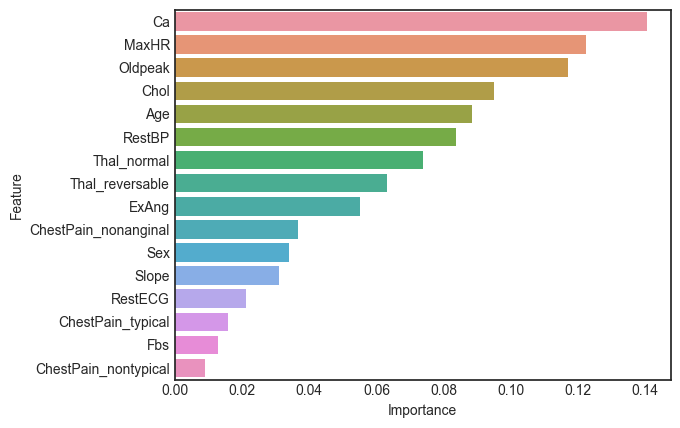

In [34]:
feature_importance = pd.DataFrame([X.columns, model_rf.feature_importances_]).T
feature_importance.columns = ["Feature", "Importance"]
feature_importance.sort_values(by = "Importance", ascending = False, inplace = True)
sns.barplot(data = feature_importance, x = "Importance", y = "Feature");